In [7]:
#Data loading and basic information about the dataset
import pandas as pd

# Load the dataset
data = pd.read_csv(r'C:\Users\Abdul Haseeb\Desktop\Recommender system\Recommender-System\Amazon_Beauty_Recommendation.csv')

# Display basic information about the dataset
print("Dataset Head:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Dataset Head:
           UserId   ProductId       ProductType  Rating   Timestamp  \
0  A3NHUQ33CFH3VM  B00LLPT4HI  Eyeliner & Kajal       5  1405814400   
1  A1TIRNQ7O4REOH  B00LLPT4HI  Eyeliner & Kajal       4  1405987200   
2  A2Y36BR4YSY9F7  B00LLPT4HI  Eyeliner & Kajal       5  1405728000   
3  A23H6FAOLEMAKC  B00LLPT4HI  Eyeliner & Kajal       5  1405814400   
4  A3CHYZGF3OO6WD  B00LLPT4HI  Eyeliner & Kajal       5  1405641600   

                                                 URL  
0  https://www.amazon.in/Maybelline-Colossal-Kaja...  
1  https://www.amazon.in/Maybelline-Colossal-Kaja...  
2  https://www.amazon.in/Maybelline-Colossal-Kaja...  
3  https://www.amazon.in/Maybelline-Colossal-Kaja...  
4  https://www.amazon.in/Maybelline-Colossal-Kaja...  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348246 entries, 0 to 1348245
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   UserId     


Updated Data Types:
UserId                 object
ProductId              object
ProductType            object
Rating                  int64
Timestamp      datetime64[ns]
URL                    object
dtype: object

Rating Distribution:
Rating
1    120305
2     75480
3    114825
4    214453
5    823183
Name: count, dtype: int64


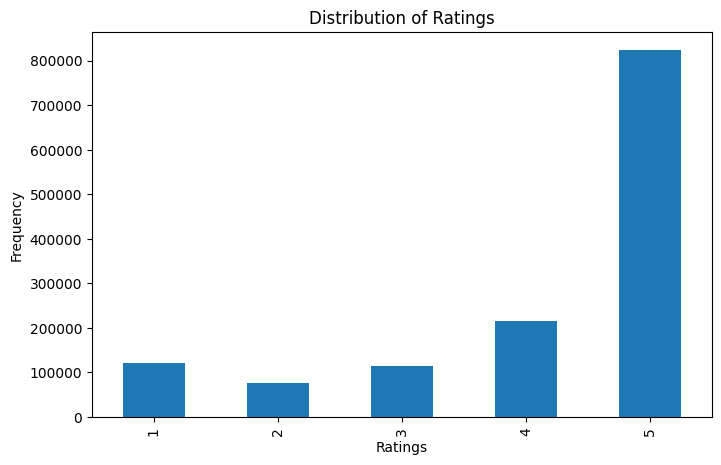

In [8]:
##Data preprocessing
# Convert Timestamp to a readable datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')

# Check data types after conversion
print("\nUpdated Data Types:")
print(data.dtypes)

# Exploratory Analysis: Distribution of Ratings
rating_distribution = data['Rating'].value_counts().sort_index()

# Display the rating distribution
print("\nRating Distribution:")
print(rating_distribution)

# Plot the rating distribution (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
rating_distribution.plot(kind='bar')
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()


In [9]:
#feature engineering
from sklearn.model_selection import train_test_split

# Map UserId and ProductId to numeric IDs
user_mapping = {id: idx for idx, id in enumerate(data['UserId'].unique())}
product_mapping = {id: idx for idx, id in enumerate(data['ProductId'].unique())}

data['UserId'] = data['UserId'].map(user_mapping)
data['ProductId'] = data['ProductId'].map(product_mapping)

# Split data into training and testing sets (80-20 split)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Display the number of unique users and products in the training set
print(f"Number of unique users: {data['UserId'].nunique()}")
print(f"Number of unique products: {data['ProductId'].nunique()}")
print(f"Training set size: {train_data.shape[0]}")
print(f"Testing set size: {test_data.shape[0]}")


Number of unique users: 883753
Number of unique products: 23838
Training set size: 1078596
Testing set size: 269650


In [11]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split as surprise_split
from surprise import accuracy

# Prepare data for Surprise
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(train_data[['UserId', 'ProductId', 'Rating']], reader)

# Train-test split for Surprise
trainset, valset = surprise_split(surprise_data, test_size=0.2, random_state=42)

# Train an SVD model
svd = SVD()
svd.fit(trainset)

# Validate the model
predictions = svd.test(valset)

# Evaluate accuracy
rmse = accuracy.rmse(predictions)
print(f"Validation RMSE: {rmse}")

# Save the SVD embeddings for users and items
user_embeddings = {uid: svd.pu[i] for i, uid in enumerate(trainset.all_users())}
item_embeddings = {iid: svd.qi[i] for i, iid in enumerate(trainset.all_items())}

print(f"Number of user embeddings: {len(user_embeddings)}")
print(f"Number of item embeddings: {len(item_embeddings)}")



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\Abdul Haseeb\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Abdul Haseeb\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\Abdul Haseeb\Desktop\Recommender system\Recommender-System\.venv\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\Abdul Haseeb\Desktop\Recommender sys

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).